# ANLY580 Project1

In [6]:
# Import required library
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords

Task1

In [210]:
# Input data (Data in the dev directory)

# Open Input.txt, read the file and save to variable named f
f = open('./data/Dev/INPUT.txt').readlines()
stop_words = set(stopwords.words('english'))
num_of_tweets = 0
lines = []

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Create preprocess_tweet function that preprocess the tweet by setting all the words to lower case and remove url
def preprocess_tweet(tweet):
    words = tweet.split(' ')
    temp = []
    for w in words:
        s = w.lower()
        if "http" in s or s in stop_words:
            continue
        else:
            temp.append(s)
    return " ".join(temp)

input_tuple = []
input_tweets = []
for line in f:
    num_of_tweets = num_of_tweets+1
    input_id = line.split('\t',2)[0]
    s = line.split('\t',2)[2]
    input_tuple.append((input_id,preprocess_tweet(s)))
    input_tweets.append(preprocess_tweet(s))
    
print("Total number of tweets: ", len(input_tuple))

Total number of tweets:  12284


Tokenize

In [211]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import TweetTokenizer

In [212]:
##tokenize with different tokenizer
white_tokens = WhitespaceTokenizer().tokenize(" ".join(input_tweets))
tweet_tokens = TweetTokenizer().tokenize(" ".join(input_tweets))
print("Total number of words white: ", len(white_tokens))
print("Total number of words tweet: ", len(tweet_tokens))

Total number of words white:  124923
Total number of words tweet:  153822


In [213]:
##get the frequency
from nltk.probability import ConditionalFreqDist
from nltk.probability import FreqDist

tweet_tokens = list(filter (lambda s:any([c.isalnum() for c in s]), tweet_tokens))
white_tokens = list(filter (lambda s:any([c.isalnum() for c in s]), white_tokens))

In [214]:
freq_white = FreqDist(white_tokens)
freq_tweet = FreqDist(tweet_tokens)

In [215]:
#The total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary
top10 = list(freq_white.most_common(10))
for t in top10:
    print(t[0],": ",t[1])

trump :  710
like :  464
via :  377
get :  356
i'm :  297
one :  295
new :  292
people :  292
would :  260
us :  247


In [216]:
input_tuple_tokens = []
num_of_chars = 0
lchars = []
for tu in input_tuple:
    tokens = WhitespaceTokenizer().tokenize(tu[1])
    tokens = list(filter (lambda s:any([c.isalnum() for c in s]), tokens))
    num_of_chars = num_of_chars + len(tu[1])
    input_tuple_tokens.append((tu[0],tokens))
    
    
print("avg words per tweet: ", len(white_tokens)/len(input_tweets))
print("avg chars per tweet: ", num_of_chars/len(input_tweets))

for token in white_tokens:
    lchars.append(len(token))

print("Avg chars of tokens: ",np.mean(lchars))
print("Std chars of tokens: ",np.std(lchars))

print("Unique words: ", len(set(white_tokens)))
print("Token/Type: ", len(set(white_tokens))/len(white_tokens))

avg words per tweet:  9.901497883425595
avg chars per tweet:  77.4558775643113
Avg chars of tokens:  6.790109348022692
Std chars of tokens:  3.531759688124525
Unique words:  38999
Token/Type:  0.32063635616213104


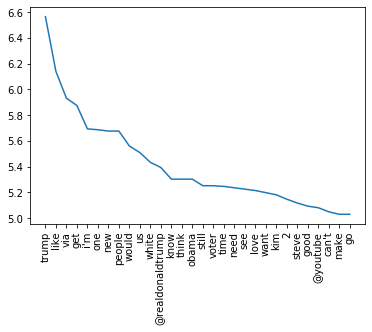

In [217]:
##token log frequency plot
from matplotlib import pyplot as plt
top30 = list(freq_white.most_common(30))
word30 = [t[0] for t in top30]
log30 = [np.log(t[1]) for t in top30]
plt.plot(word30,log30)
plt.xticks(rotation=90)
plt.show()

In [220]:
from nltk import ngrams
n_grams = {}

for n in range(2,6):
    d_n = {}
    for t in input_tweets:
        grams = ngrams(t.split(),n)
        for g in grams:
            if g in d_n:
                d_n[g] = d_n[g]+1
            else:
                d_n[g] = 1
    n_grams[n] = d_n
    print("Distinct",n,"grams words: ",len(d_n))

Distinct 2 grams words:  99809
Distinct 3 grams words:  97937
Distinct 4 grams words:  87533
Distinct 5 grams words:  76017


In [222]:
n_grams_chars = {}
for n in range(2,8):
    d_char = {}
    for b in input_tweets:
        grams = [b[i:i+n] for i in range(len(b)-n+1)]
        for g in grams:
            if g in d_char:
                d_char[g] = d_char[g]+1
            else:
                d_char[g] = 1
    n_grams_chars[n] = d_char
    print("Distinct",n,"grams chars: ",len(d_char))

Distinct 2 grams chars:  4597
Distinct 3 grams chars:  29535
Distinct 4 grams chars:  102820
Distinct 5 grams chars:  226659
Distinct 6 grams chars:  363957
Distinct 7 grams chars:  476797


In [223]:
##Combine all the input.
dev = open('./data/Gold/dev.txt').readlines()
devtest = open('./data/Gold/devtest.txt').readlines()
test = open('./data/Gold/test.txt').readlines()
train = open('./data/Gold/train.txt').readlines()

In [224]:
def read_gold_files(f):
    res = []
    for line in f:
        s = line.split('\t',2)
        res.append((preprocess_tweet(s[2]),s[1]))
    return res

gold_tweets = read_gold_files(dev)+read_gold_files(devtest)+read_gold_files(test)+read_gold_files(train)

In [225]:
gold_tweets[1:10]

[('jay z joins instagram nostalgic tribute michael jackson: jay z apparently joined instagram saturday and..',
  'positive'),
 ('michael jackson: bad 25th anniversary edition (picture vinyl): unique picture disc vinyl includes original 1',
  'neutral'),
 ('liked @youtube video one direction singing "man mirror" michael jackson atlanta, ga [june 26,\n',
  'positive'),
 ("18th anniv princess diana's death. still want believe living private island away public. michael jackson.\n",
  'positive'),
 ('@oridaganjazz 1st time heard michael jackson sing honolulu, hawaii @ restaurant radio. a.b.c. 13. loved it!\n',
  'positive'),
 ("'michael jackson' appeared saturday 29 9th place top20 miami's trends: #trndnl\n",
  'neutral'),
 ('old enough remember michael jackson attending grammys brooke shields webster sat lap show?\n',
  'positive'),
 ("@etbowser u enjoy 2nd rate michael jackson bit? honest ques. like can't feel face song god obvious want mj 2.0\n",
  'negative'),
 ('weeknd closest thing ma

Num of tokens gold only: 27482
Training Positive:  9739
Training Negative:  9739
Training Neutral:  9739


//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


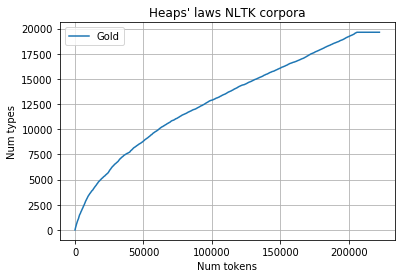

In [226]:
tokens_tweet_url_punct_removed = white_tokens

def remove_http(tweet):
    t = tweet.split(' ')
    temp = []
    for s in t:
        if "https://"  in s or "http://" in s or s.lower() in stop_words:
            continue
        else:
            temp.append(s.lower())
    return " ".join(temp)

def read_tweets(f):
    positive = []
    negative = []
    neutral = []
    tweets = []
    res = []
    for s in f:
        t = s.split('\t')
        t[2] = remove_http(t[2])
        if t[1] == "positive":
            positive.append(t[2])
        elif t[1] == "negative":
            negative.append(t[2])
        elif t[1] == "neutral":
            neutral.append(t[2])
        tweets.append(t[2])
        res.append(t[1])
    d = {}
    d["positive"] = positive
    d["negative"] = negative
    d["neutral"] = neutral
    return tweets,d,res

##dev_tweets, dev_tweets_dict,dev_res = read_tweets(dev)

dev_tweets, dev_tweets_dict, dev_res = read_tweets(dev)
devtest_tweets, devtest_tweets_dict, devtest_res = read_tweets(devtest)
test_tweets, test_tweets_dict, test_res = read_tweets(test)
train_tweets, train_tweets_dict, train_res = read_tweets(dev)

#dev_tweets_dict['positive']

tokens_dev_tweets = {}
tokens_devtest_tweets = {}
tokens_test_tweets = {}
tokens_train_tweets = {}

def process_list_tweets(tweets):
    res = []
    for tweet in tweets:
        tokens = TweetTokenizer().tokenize(tweet)
        tokens =  list(filter (lambda s:any([c.isalnum() for c in s]), tokens))
        tokens = [x.lower() for x in tokens]
        res.append(tokens)
    return res

tokens_dev_tweets['positive'] = process_list_tweets(dev_tweets_dict['positive'])
tokens_dev_tweets['negative'] = process_list_tweets(dev_tweets_dict['negative'])
tokens_dev_tweets['neutral'] = process_list_tweets(dev_tweets_dict['neutral'])

tokens_devtest_tweets['positive'] = process_list_tweets(devtest_tweets_dict['positive'])
tokens_devtest_tweets['negative'] = process_list_tweets(devtest_tweets_dict['negative'])
tokens_devtest_tweets['neutral'] = process_list_tweets(devtest_tweets_dict['neutral'])

tokens_test_tweets['positive'] = process_list_tweets(test_tweets_dict['positive'])
tokens_test_tweets['negative'] = process_list_tweets(test_tweets_dict['negative'])
tokens_test_tweets['neutral'] = process_list_tweets(test_tweets_dict['neutral'])

tokens_train_tweets['positive'] = process_list_tweets(train_tweets_dict['positive'])
tokens_train_tweets['negative'] = process_list_tweets(train_tweets_dict['negative'])
tokens_train_tweets['neutral'] = process_list_tweets(train_tweets_dict['neutral'])


tokens_gold_only = []
for att in tokens_dev_tweets:
    for tw in tokens_dev_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)
                

len(tokens_gold_only)

for att in tokens_devtest_tweets:
    for tw in tokens_devtest_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)
                


for att in tokens_test_tweets:
    for tw in tokens_test_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)



for att in tokens_train_tweets:
    for tw in tokens_train_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)

print("Num of tokens gold only:",len(tokens_gold_only))



positive_train = [item for sublist in tokens_train_tweets['positive'] for item in sublist]
freq_post_train = FreqDist(positive_train)

#freq_post_train.most_common(30)

negative_train = [item for sublist in tokens_train_tweets['negative'] for item in sublist]
freq_nega_train = FreqDist(negative_train)
#freq_nega_train.most_common(30)

neutral_train = [item for sublist in tokens_train_tweets['neutral'] for item in sublist]
freq_neut_train = FreqDist(neutral_train)
#freq_neut_train.most_common(30)

##from 2-tools.ipynb
def separate_tokens_types(words):

    """
    Given a list of words from a corpus, separate the counts of tokens and
    types in time. Return the two lists.
    """

    t_d = {}
    tokens, types = [], []
    count = 0
    for i in range(len(words)):

        if words[i] not in t_d:
            count += 1
            t_d[words[i]] = 1

        tokens.append(i + 1)
        types.append(count)

    return tokens, types

gold_words = [t.split(' ') for t in dev_tweets]+[t.split(' ') for t in devtest_tweets]
gold_words = gold_words+[t.split(' ') for t in test_tweets]+[t.split(' ') for t in train_tweets]
gold_words = [item.lower() for sublist in gold_words for item in sublist if item.isalpha()]

len(gold_words)

gold_tokens, gold_types = separate_tokens_types(gold_words)

plt.plot(gold_tokens, gold_types, label='Gold')

plt.grid()
plt.legend()
plt.title("Heaps' laws NLTK corpora")
plt.xlabel('Num tokens')
plt.ylabel('Num types')
plt.show()

In [227]:
print("Training Positive: ", len(tokens_train_tweets['positive'])+len(tokens_test_tweets['positive'])+len(tokens_dev_tweets['positive'])+len(tokens_devtest_tweets['positive']))
print("Training Negative: ", len(tokens_train_tweets['negative'])+len(tokens_test_tweets['negative'])+len(tokens_dev_tweets['negative'])+len(tokens_devtest_tweets['negative']))
print("Training Neutral: ", len(tokens_train_tweets['neutral'])+len(tokens_test_tweets['neutral'])+len(tokens_dev_tweets['neutral'])+len(tokens_devtest_tweets['neutral']))

Training Positive:  9739
Training Negative:  4338
Training Neutral:  12553


In [228]:
def features(tweet):
    tokens = WhitespaceTokenizer().tokenize(tweet)
    tokens = list(filter (lambda s:any([c.isalnum() for c in s]), tokens))
    return dict(('contains(%s)' % w, True) for w in tokens)

from sklearn.model_selection import train_test_split
trains, tests = train_test_split(gold_tweets, test_size = 0.25, random_state=42)

In [229]:
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [230]:
training_features = [(features(tu[0]),tu[1]) for tu in trains]

In [231]:
len(training_features)

22973

In [232]:
sentiment_analyzer = SentimentAnalyzer()
trainer = NaiveBayesClassifier.train
classifier = sentiment_analyzer.train(trainer, training_features)

Training classifier


In [233]:
truth_list = [(features(tu[0]),tu[1]) for tu in tests]

In [234]:
sentiment_analyzer.evaluate(truth_list,classifier)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.5728649778009924,
 'Precision [positive]': 0.6414746543778802,
 'Recall [positive]': 0.6904761904761905,
 'F-measure [positive]': 0.6650740563784042,
 'Precision [neutral]': 0.6471095772217429,
 'Recall [neutral]': 0.43770061278085787,
 'F-measure [neutral]': 0.5221932114882506,
 'Precision [negative]': 0.38321342925659474,
 'Recall [negative]': 0.6619718309859155,
 'F-measure [negative]': 0.48541919805589306}

In [235]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [236]:
nltk_vader_res = []

analyzer = SentimentIntensityAnalyzer()
sentences = [t[0] for t in tests]
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    if vs['compound'] >= 0.45 : 
        nltk_vader_res.append("positive") 
    elif vs['compound'] <= - 0.45 : 
        nltk_vader_res.append("negative") 
    else : 
        nltk_vader_res.append("neutral")

In [237]:
correct = 0
for i in range(len(sentences)):
    if nltk_vader_res[i] == tests[i][1]: 
        correct = correct+1
correct/len(sentences)

0.5629407155915382

In [238]:
trainingFeatures=nltk.classify.apply_features(features,trains)

In [239]:
NBayesClassifier=nltk.NaiveBayesClassifier.train(trainingFeatures)

In [240]:
NBResultLabels = [NBayesClassifier.classify(tu[0]) for tu in truth_list]

In [241]:
nb = 0
for i in range(len(NBResultLabels)):
    if NBResultLabels[i] == truth_list[i][1]:
        nb = nb+1


In [242]:
input_list = [features(t) for t in input_tweets]

In [243]:
input_res = [NBayesClassifier.classify(t) for t in input_list]

In [244]:
with open('res.txt', 'w') as filehandle:
    for listitem in input_res:
        filehandle.write('%s\n' % listitem)

In [245]:
def bigram_features(tweet):
    grams = ngrams(tweet.lower().split(),2)
    return dict(('contains(%s)' % " ".join(w), True) for w in grams)

In [246]:
training_bigram_features = [(bigram_features(tu[0]),tu[1]) for tu in trains]

In [247]:
len(training_bigram_features)

22973

In [248]:
trainer_bigram = NaiveBayesClassifier.train
classifier_bigram = sentiment_analyzer.train(trainer_bigram, training_bigram_features)

Training classifier


In [249]:
truth_list_bigram = [(bigram_features(tu[0]),tu[1]) for tu in tests]

In [250]:
sentiment_analyzer.evaluate(truth_list_bigram,classifier_bigram)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.5164533820840951,
 'Precision [positive]': 0.5848303393213573,
 'Recall [positive]': 0.5813492063492064,
 'F-measure [positive]': 0.583084577114428,
 'Precision [neutral]': 0.5533824943892273,
 'Recall [neutral]': 0.5036475051065071,
 'F-measure [neutral]': 0.5273449434769325,
 'Precision [negative]': 0.30724070450097846,
 'Recall [negative]': 0.39022369511184757,
 'F-measure [negative]': 0.3437956204379562}

In [251]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [252]:
x_train = []
y_train = []
for tu in trains:
    x_train.append(tu[0])
    if tu[1] == 'positive':
        y_train.append(0)
    elif tu[1] == 'negative':
        y_train.append(2)
    else:
        y_train.append(1)

In [253]:
vectorizer = CountVectorizer(lowercase=False)

In [254]:
vectorizer.fit(x_train)

x_train_dtm = vectorizer.transform(x_train)

x_train_dtm

<22973x32922 sparse matrix of type '<class 'numpy.int64'>'
	with 270026 stored elements in Compressed Sparse Row format>

In [255]:
x_test = []
y_test = []
for tu in tests:
    x_test.append(tu[0])
    if tu[1] == 'positive':
        y_test.append(0)
    elif tu[1] == 'negative':
        y_test.append(2)
    else:
        y_test.append(1)
        

x_test_dtm = vectorizer.transform(x_test)

x_test_dtm

<7658x32922 sparse matrix of type '<class 'numpy.int64'>'
	with 83046 stored elements in Compressed Sparse Row format>

In [256]:
logreg = LogisticRegression()

In [257]:
logreg.fit(x_train_dtm, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
y_prediction_class = logreg.predict(x_test_dtm)

In [259]:
target_names = ['positive', 'neutral', 'negative']
score = metrics.precision_recall_fscore_support(y_true=y_test, y_pred=y_prediction_class)
print(classification_report(y_true=y_test, y_pred=y_prediction_class, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.66      0.68      0.67      3024
     neutral       0.60      0.67      0.64      3427
    negative       0.60      0.36      0.45      1207

    accuracy                           0.62      7658
   macro avg       0.62      0.57      0.58      7658
weighted avg       0.62      0.62      0.62      7658



In [261]:
type(stop_words)

set